In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import datetime
plt.rcParams['figure.figsize'] = (11.0, 9.0)
%matplotlib inline

In [95]:
train = pd.read_csv('training.csv', low_memory=False)
test = pd.read_csv('predict.csv', low_memory=False)

### Creating new features from posted_time

In [96]:
# complete date with hours
train['post'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms'))
train['post']

0      2017-12-23 17:26:40
1      2017-12-24 10:06:40
2      2017-12-24 12:53:20
3      2017-12-25 08:20:00
4      2017-12-25 08:20:00
               ...        
9413   2019-11-04 09:33:20
9414   2019-07-31 08:00:00
9415   2019-11-06 17:06:40
9416   2019-11-06 17:06:40
9417   2019-11-06 17:06:40
Name: post, Length: 9418, dtype: datetime64[ns]

In [39]:
train['post'].describe()

count                    9418
unique                   2688
top       2018-06-29 16:33:20
freq                      159
first     2013-06-25 06:00:00
last      2019-11-06 17:06:40
Name: post, dtype: object

In [97]:
# just date
train['post_date'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').date())
train['post_date']

0       2017-12-23
1       2017-12-24
2       2017-12-24
3       2017-12-25
4       2017-12-25
           ...    
9413    2019-11-04
9414    2019-07-31
9415    2019-11-06
9416    2019-11-06
9417    2019-11-06
Name: post_date, Length: 9418, dtype: object

In [98]:
# just hour
train['hour_of_day'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').time())
train['hour_of_day']

0       17:26:40
1       10:06:40
2       12:53:20
3       08:20:00
4       08:20:00
          ...   
9413    09:33:20
9414    08:00:00
9415    17:06:40
9416    17:06:40
9417    17:06:40
Name: hour_of_day, Length: 9418, dtype: object

In [99]:
# day of a week - Monday == 1 to Sunday == 7
train['day_of_week'] = train['posted_time'].apply(lambda x: pd.Timestamp(x, unit='ms').isoweekday())

In [100]:
# sorting by dates
train.sort_values(by='post_date', inplace=True)
train.set_index('post_date', drop=False, inplace=True)

start = pd.to_datetime('2017-12-23').date()
end = pd.to_datetime('2019-11-06').date()
# taking just two-year period 
df = train.loc[start : end]

In [101]:
# dividing into numerical and categorical 
cat = df.select_dtypes(include=['object'])
num = df.select_dtypes(exclude=['object'])

In [102]:
df.tail()

,id,posted_time,updated_time,age,updated_age,app_type,owner_id,owner_type,owner_influence,number_of_likes,...,participant5_is_lead,participant5_is_in_connections,participant5_focus,participant5_order,participant5_influence,rank,post,post_date,hour_of_day,day_of_week
post_date,,,,,,,,,,,,,,,,,,,,,
2019-11-06,269169,1.573040e+12,1.573040e+12,4.166351e+09,4.166351e+09,other,40316,space,0.50000,0,...,0,1,marketing,1,0.23077,0.49912,2019-11-06 11:33:20,2019-11-06,11:33:20,3
2019-11-06,269114,1.573030e+12,1.573030e+12,4.174526e+09,4.174526e+09,other,3201,space,0.99992,0,...,0,1,marketing,1,0.23077,0.61414,2019-11-06 08:46:40,2019-11-06,08:46:40,3
2019-11-06,269104,1.573030e+12,1.573030e+12,4.176178e+09,4.176178e+09,other,78,user,0.99937,4,...,0,1,other,1,0.23077,0.83005,2019-11-06 08:46:40,2019-11-06,08:46:40,3
2019-11-06,269199,1.573050e+12,1.573050e+12,4.155348e+09,4.155348e+09,other,123797,user,0.10000,8,...,0,0,other,1,0.99133,0.85460,2019-11-06 14:20:00,2019-11-06,14:20:00,3
2019-11-06,269294,1.573060e+12,1.573060e+12,4.147070e+09,4.147070e+09,other,12,user,0.79592,9,...,0,1,marketing,1,0.99962,0.83285,2019-11-06 17:06:40,2019-11-06,17:06:40,3


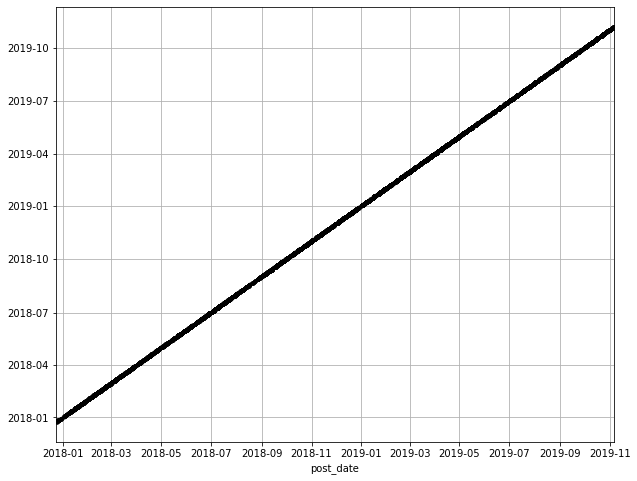

In [54]:
plt.figure(figsize=(10, 8))
df['post'].plot(style='k.')
plt.grid()
plt.show()

### All two-year period according to rank (y-axis)

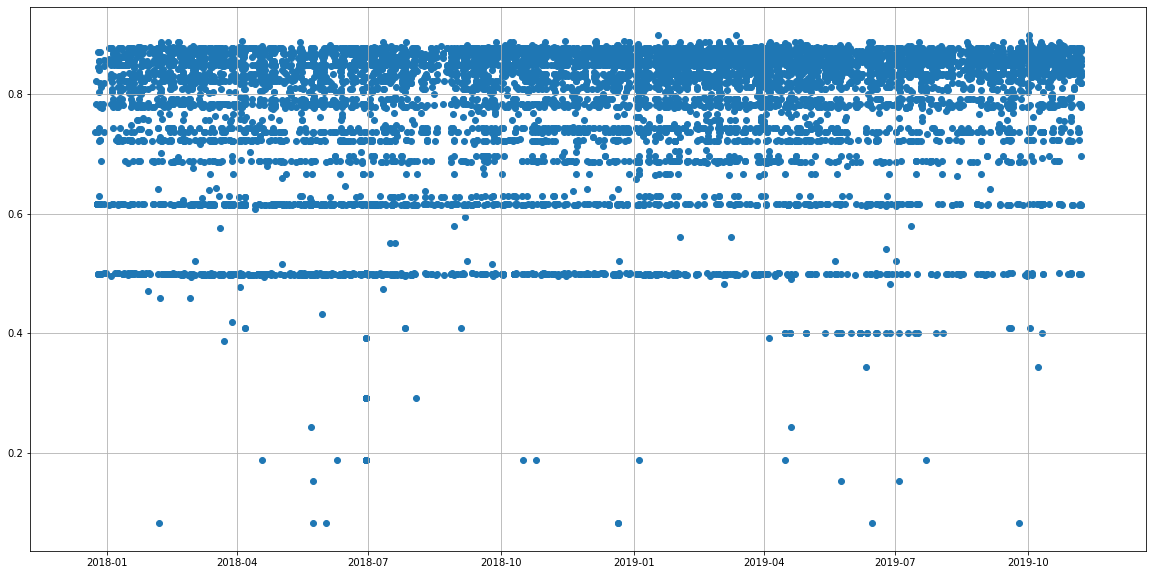

In [75]:
plt.figure(figsize=(20, 10))
plt.scatter(df['post'], df['rank'])
plt.grid()

### Linear dependency of posted_time and age (in days)

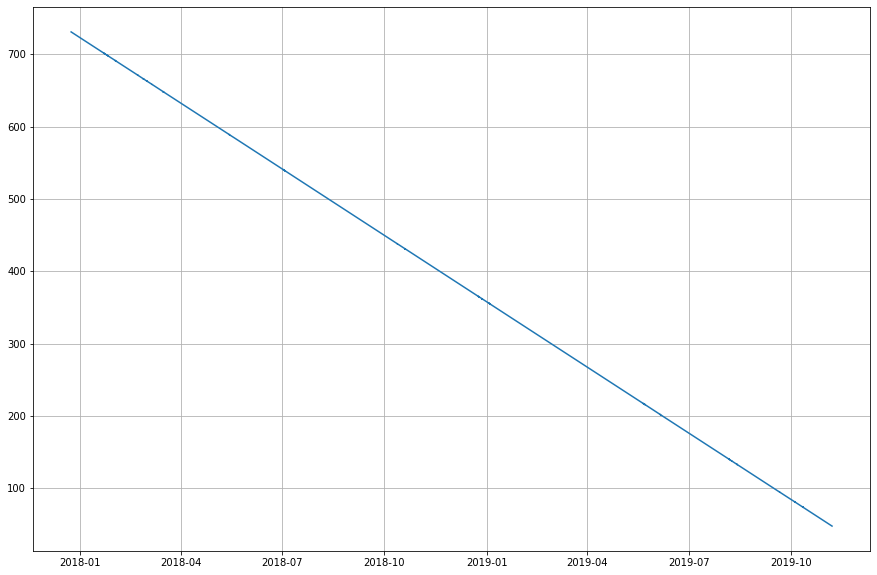

In [87]:
plt.figure(figsize=(15, 10))
plt.plot(df['post'], df['age']/(1000*3600*24))
plt.grid()

### Here we see age distribution 

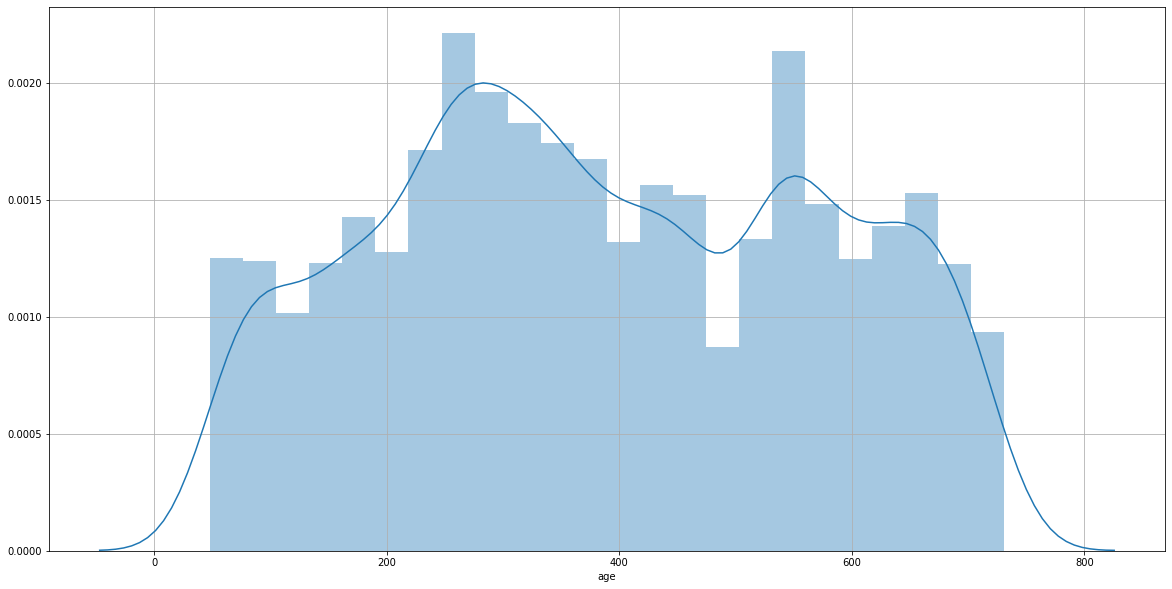

In [88]:
plt.figure(figsize=(20, 10))
sns.distplot(df['age']/(1000*3600*24))
plt.grid()

### Day analysis

In [104]:
# choosing the day with the largest number of news
day1 = df.loc[df['post_date'] == datetime.date(2019, 11, 6)]

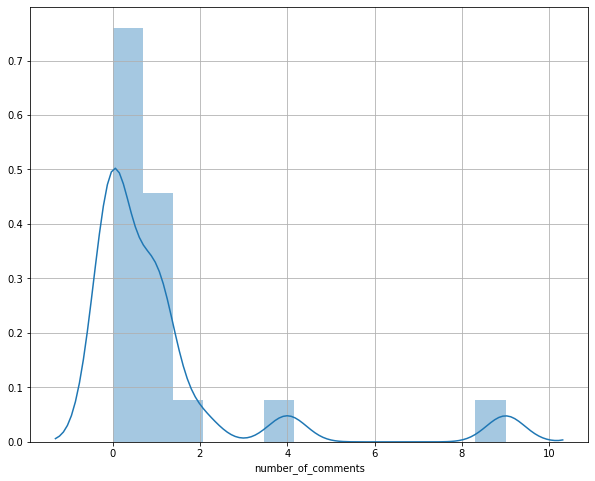

In [140]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['number_of_comments'])
plt.grid()

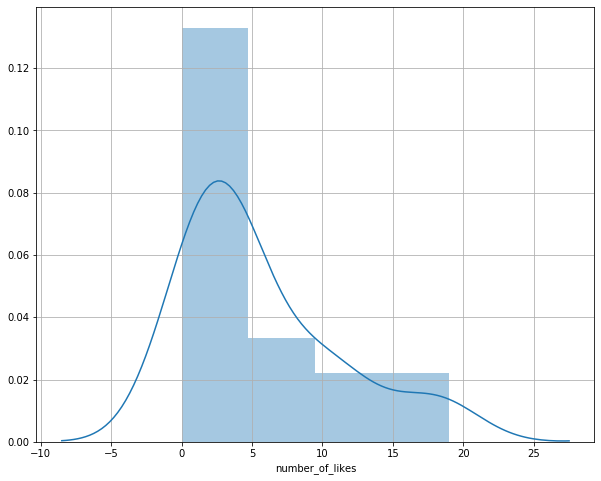

In [139]:
plt.figure(figsize=(10, 8))
sns.distplot(day1['number_of_likes'])
plt.grid()

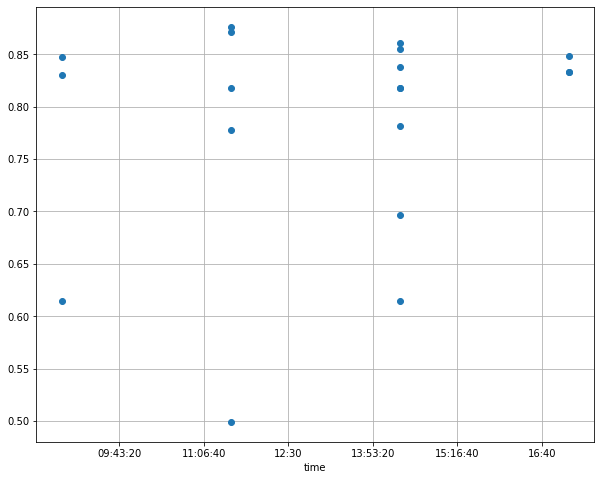

In [137]:
plt.figure(figsize = (10,8))
plt.plot_date(day1['hour_of_day'], day1['rank'])
plt.grid()
plt.show()

### Analyzing numerical features in day1 (last day in dataset)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


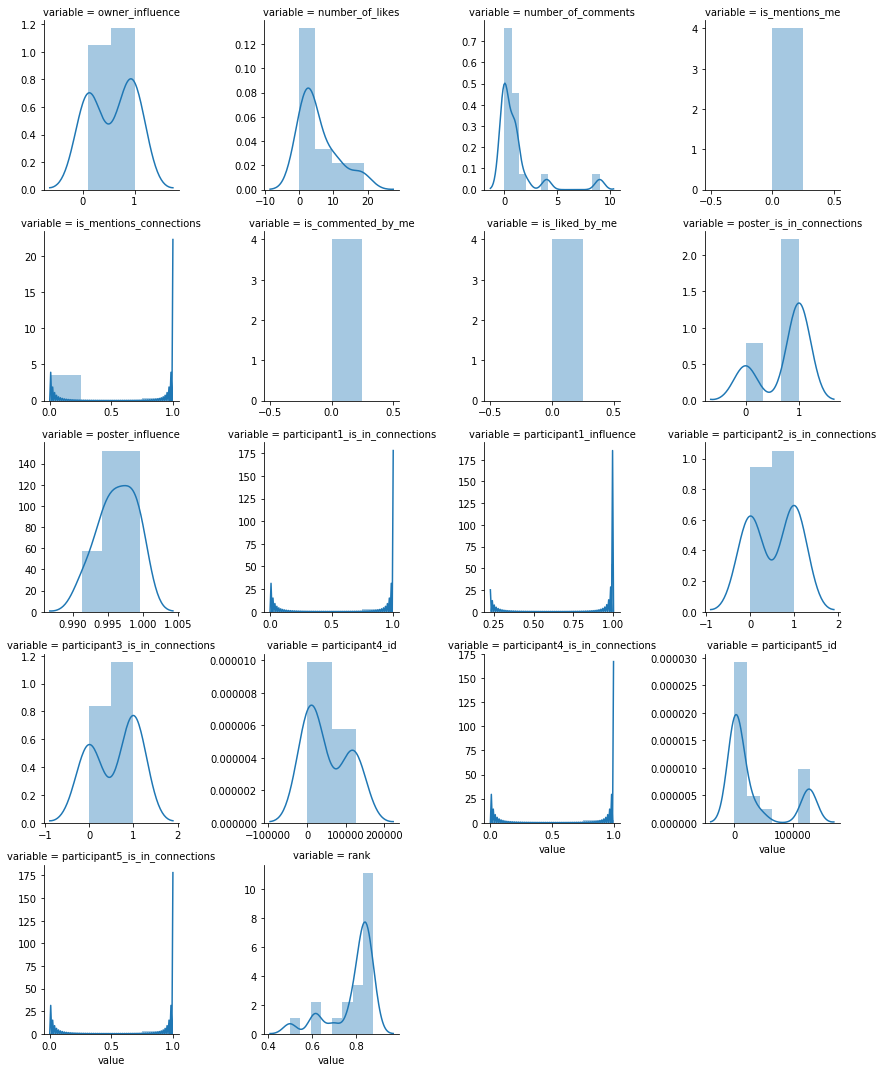

In [141]:
num_day1 = day1.select_dtypes(exclude=['object', 'datetime'])
nd = pd.melt(num_day1, value_vars = skewed_cols)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Analyzing day2 numerical features (day in the middle) 

In [142]:
day2 = df.loc[df['post_date'] == datetime.date(2018, 3, 21)]

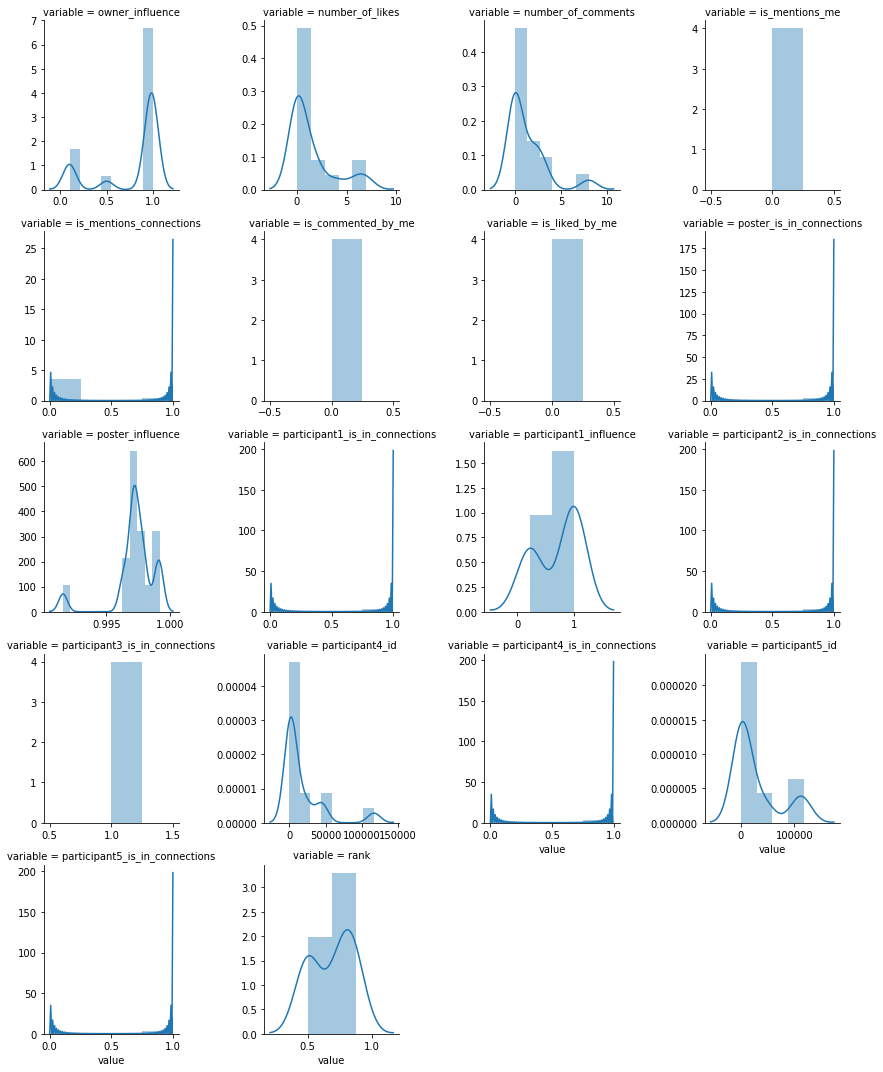

In [144]:
num_day2 = day2.select_dtypes(exclude=['object'])
nd = pd.melt(num_day2, value_vars = skewed_cols)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

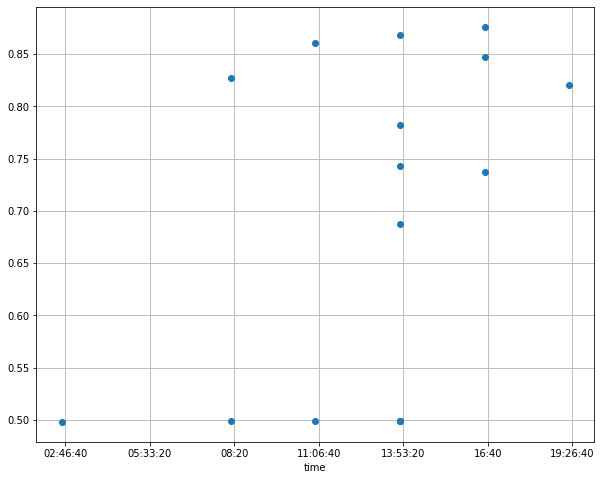

In [94]:
plt.figure(figsize = (10,8))
plt.plot_date(day2['hour_of_day'], day2['rank'])
plt.grid()
plt.show()

In [145]:
# analyzing all categorical variable using boxplots
cat_day1 = [c for c in day1.columns if day1[c].dtypes == 'object']
cat_day2 = [c for c in day2.columns if day2[c].dtypes == 'object']

In [146]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x = x, y = y)
    x = plt.xticks(rotation=90)

### Analyzing day1 categorical

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


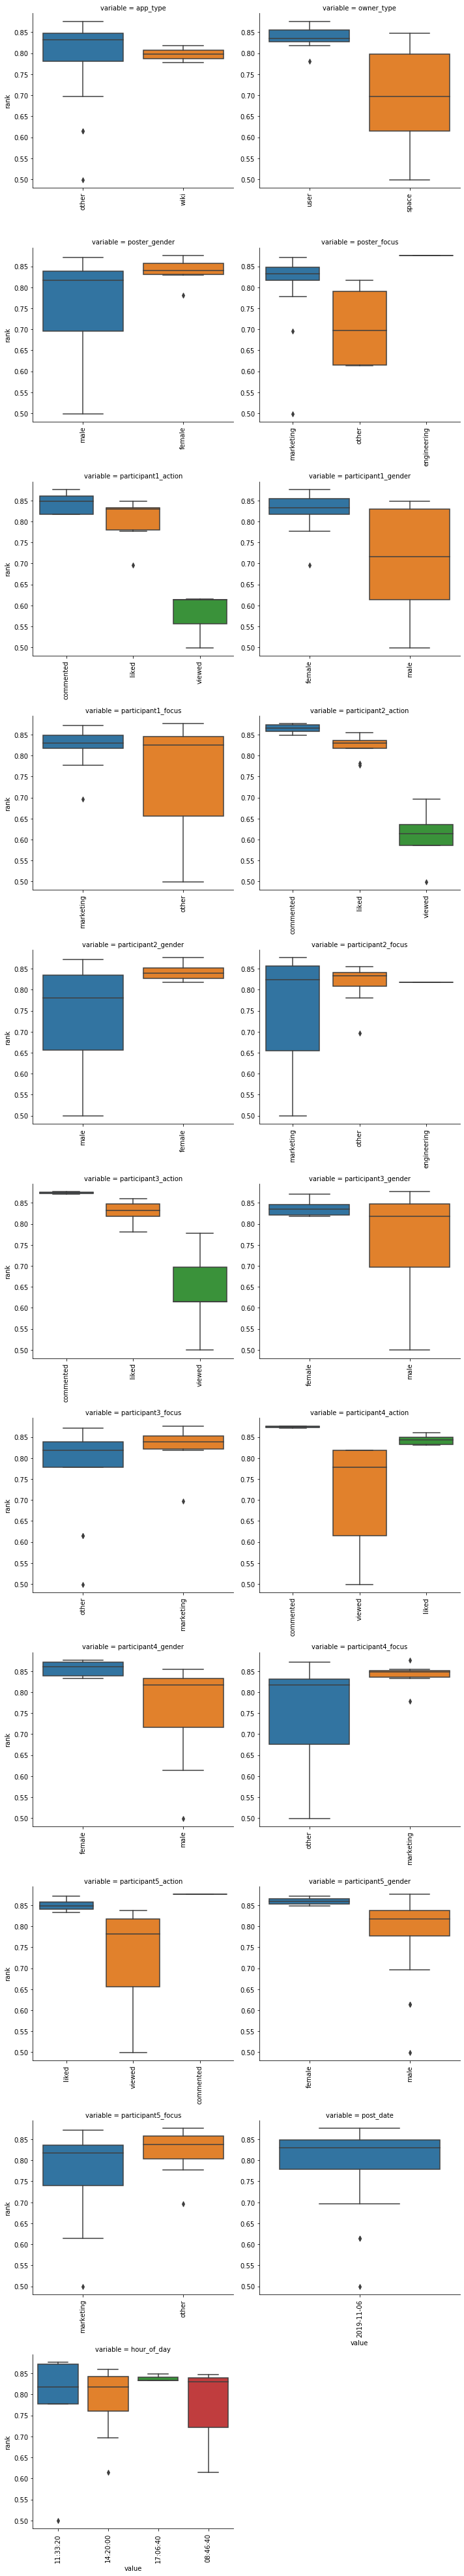

In [147]:
pivot = pd.melt(day1, id_vars='rank', value_vars = cat_day1)
grid = sns.FacetGrid(pivot, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
grid = grid.map(boxplot, 'value', 'rank')
grid

### Analyzing day2 categorical

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


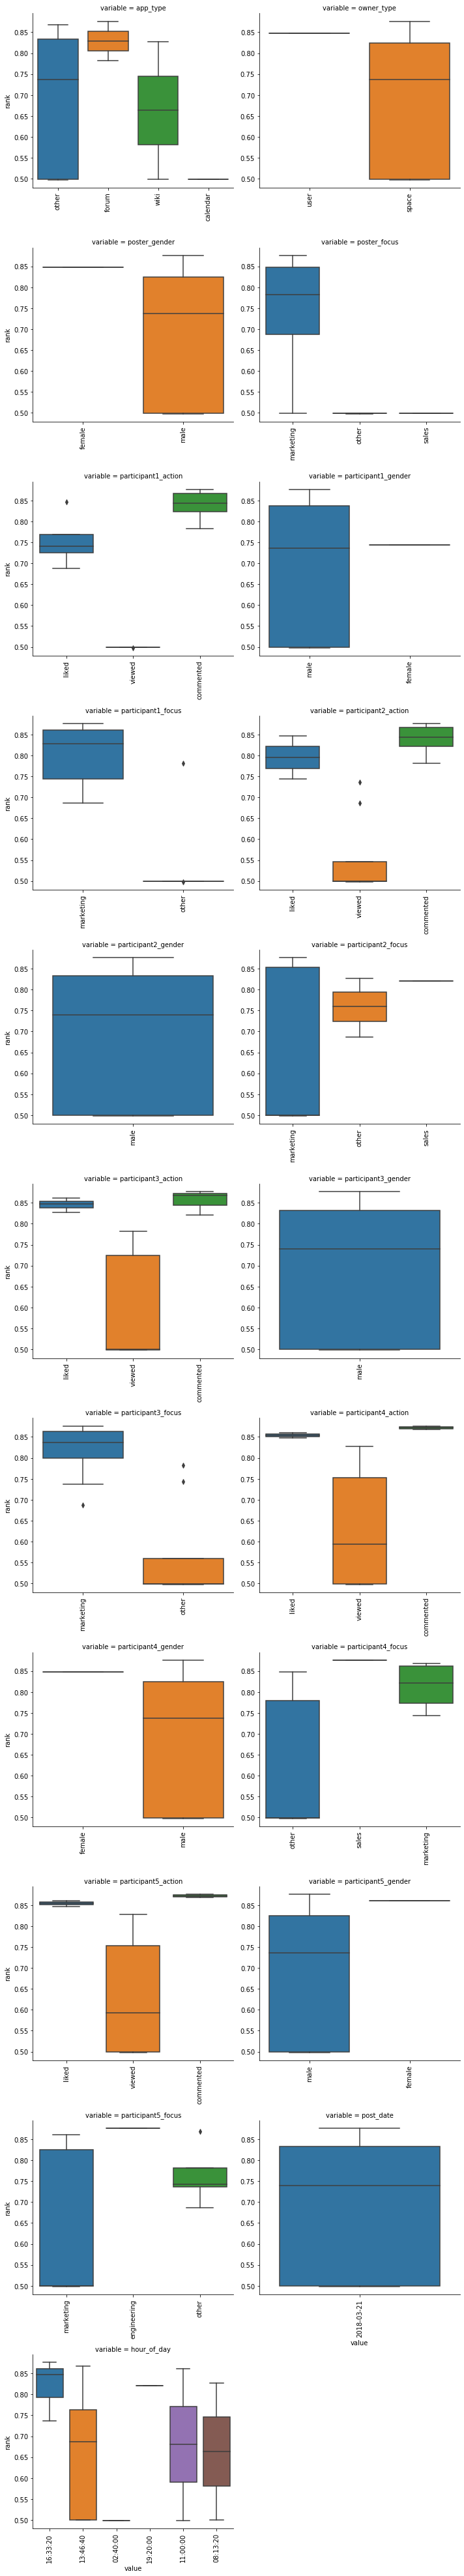

In [148]:
pivot = pd.melt(day2, id_vars='rank', value_vars = cat_day2)
grid = sns.FacetGrid(pivot, col='variable', col_wrap=2, sharex=False, sharey=False, size=5)
grid = grid.map(boxplot, 'value', 'rank')
grid

In [95]:
# selecting just one week (but there is no Saturday in this specific one)
start_date = pd.to_datetime('2019-10-28').date()
end_date = pd.to_datetime('2019-11-03').date()
week = df.loc[start_date : end_date]

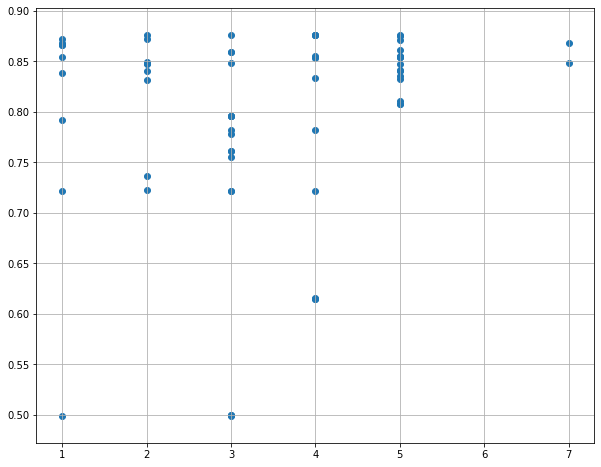

In [96]:
plt.figure(figsize = (10,8))
plt.scatter(week['day_of_week'], week['rank'])
plt.grid()
plt.show()

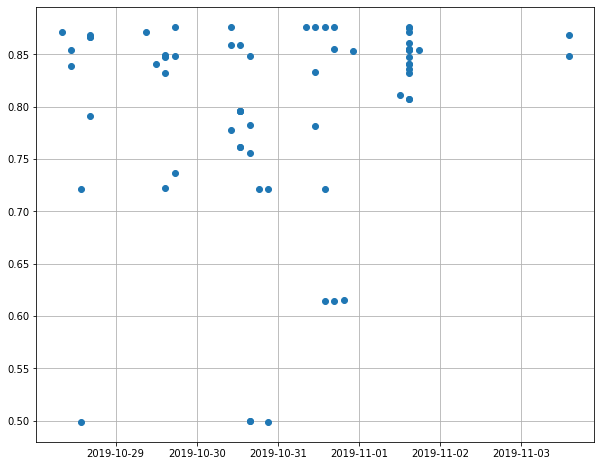

In [97]:
plt.figure(figsize = (10,8))
plt.plot_date(week['post'], week['rank'])
plt.grid()
plt.show()

## Skewness

In [52]:
# drop datetime column for error fixing
num.drop('post', axis=1, inplace=True)

/Users/lenasoroka/anaconda3/envs/tensorflow/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [53]:
# skewness for numerical features
from scipy.stats import skew
skewness = num.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

is_mentions_me                    16.476476
is_commented_by_me                 7.778110
is_liked_by_me                     5.209375
number_of_comments                 4.900434
number_of_likes                    3.104552
is_mentions_connections            1.830201
participant5_id                    1.327745
participant4_id                    1.047579
participant1_id                    0.864829
participant5_is_employee           0.818884
participant2_id                    0.818384
reactivity                         0.816480
participant3_id                    0.787576
participant4_is_employee           0.514746
participant5_influence             0.405856
poster_id                          0.305244
participant3_is_employee           0.171653
owner_id                           0.165818
day_of_week                        0.114627
updated_age                        0.078761
id                                 0.068244
participant4_influence             0.057403
age                             

In [54]:
skewed_cols = list(skewness[abs(skewness) > 1].index)
skewed_cols

['owner_influence',
 'number_of_likes',
 'number_of_comments',
 'is_mentions_me',
 'is_mentions_connections',
 'is_commented_by_me',
 'is_liked_by_me',
 'poster_is_in_connections',
 'poster_influence',
 'participant1_is_in_connections',
 'participant1_influence',
 'participant2_is_in_connections',
 'participant3_is_in_connections',
 'participant4_id',
 'participant4_is_in_connections',
 'participant5_id',
 'participant5_is_in_connections',
 'rank']

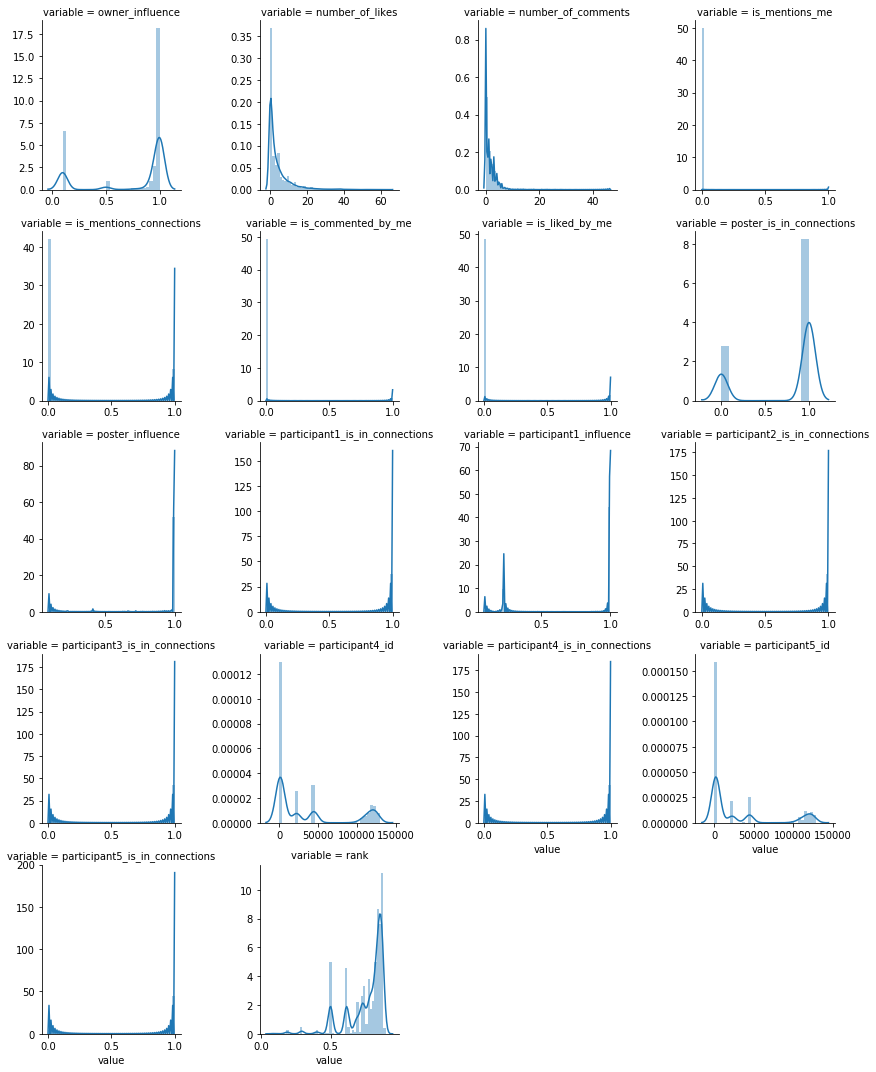

In [55]:
nd = pd.melt(num, value_vars = skewed_cols)
n1 = sns.FacetGrid(nd, col = 'variable', col_wrap = 4, sharex = False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

In [95]:
train.poster_influence.describe()

count    9418.000000
mean        0.965250
std         0.151862
min         0.090910
25%         0.995860
50%         0.998060
75%         0.998950
max         0.999620
Name: poster_influence, dtype: float64

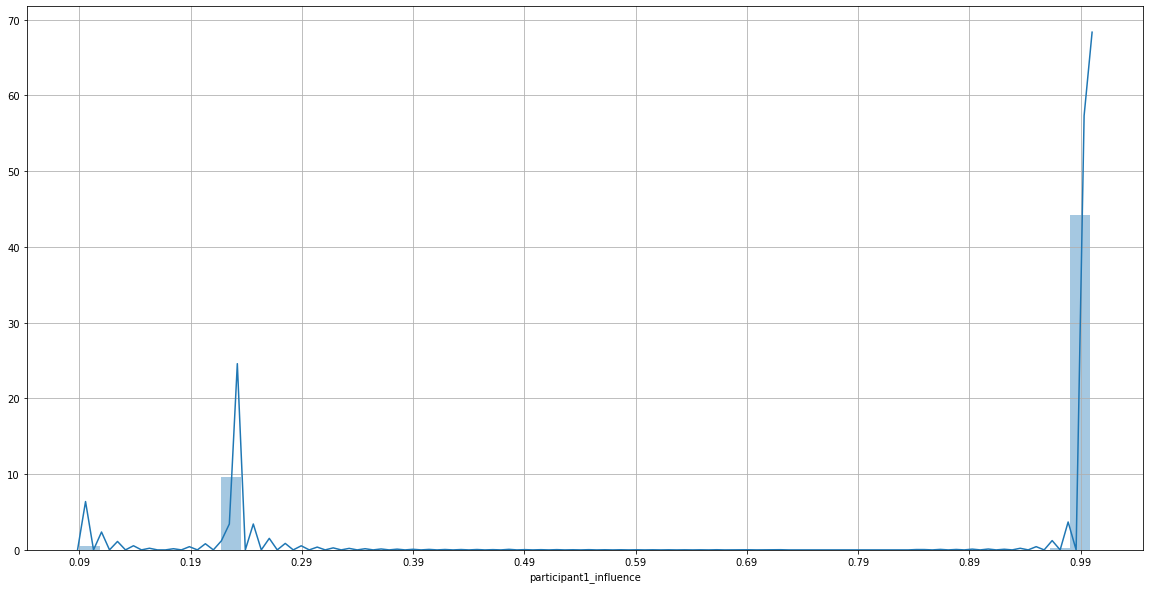

In [84]:
x = two_year_df['participant1_influence']
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(min(x), max(x)+1, 0.1))
sns.distplot(x)
plt.grid()

In [85]:
df.participant1_influence.describe()

count    9332.000000
mean        0.853552
std         0.300695
min         0.090910
25%         0.994500
50%         0.997560
75%         0.998860
max         0.999620
Name: participant1_influence, dtype: float64

In [86]:
df.participant1_influence.unique()

array([0.99899, 0.99756, 0.23077, 0.9963 , 0.99715, 0.96403, 0.99674,
       0.99896, 0.99919, 0.99787, 0.99762, 0.99436, 0.99811, 0.99015,
       0.9945 , 0.99902, 0.99825, 0.99962, 0.99866, 0.99693, 0.99645,
       0.99895, 0.99861, 0.99809, 0.99867, 0.99886, 0.99828, 0.99611,
       0.99322, 0.99813, 0.09091, 0.99772, 0.99891, 0.99808, 0.97015,
       0.84615, 0.47368, 0.99473, 0.99339, 0.99586, 0.89247, 0.99034,
       0.99589, 0.96528, 0.99198, 0.99788, 0.95327, 0.99806, 0.99027,
       0.99351, 0.99507, 0.97442, 0.52381, 0.54545, 0.98501, 0.99904,
       0.81481, 0.77273, 0.9961 , 0.99332, 0.99453, 0.6875 , 0.9927 ,
       0.69697, 0.99248, 0.72222, 0.99186, 0.90566, 0.99709, 0.99876,
       0.44444, 0.94253, 0.98246, 0.99684, 0.98955, 0.98028, 0.98775,
       0.99433, 0.99649, 0.99613, 0.86301, 0.9971 , 0.9948 , 0.97691,
       0.99337, 0.99689, 0.99842, 0.99301, 0.99471, 0.87654, 0.99583,
       0.99552, 0.99678, 0.99489, 0.89362, 0.99754, 0.98969, 0.99402,
       0.89691, 0.99

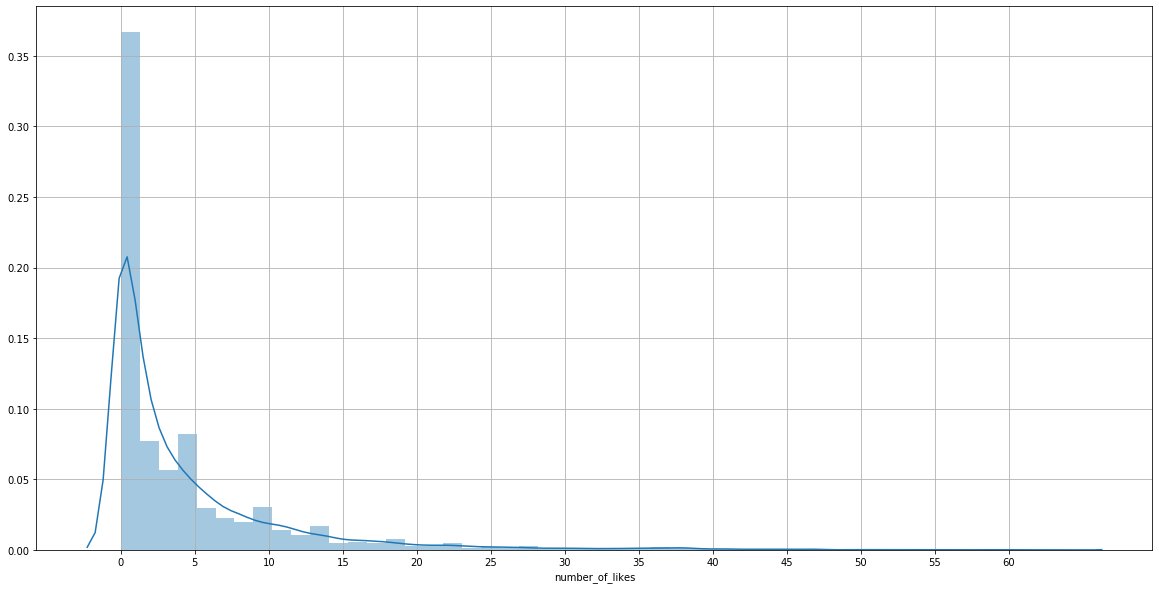

In [78]:
x = two_year_df['number_of_likes']
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(min(x), max(x)+1, 5))
sns.distplot(x)
plt.grid()

In [79]:
df.number_of_likes.describe()

count    9332.000000
mean        4.403772
std         6.964603
min         0.000000
25%         0.000000
50%         2.000000
75%         6.000000
max        64.000000
Name: number_of_likes, dtype: float64

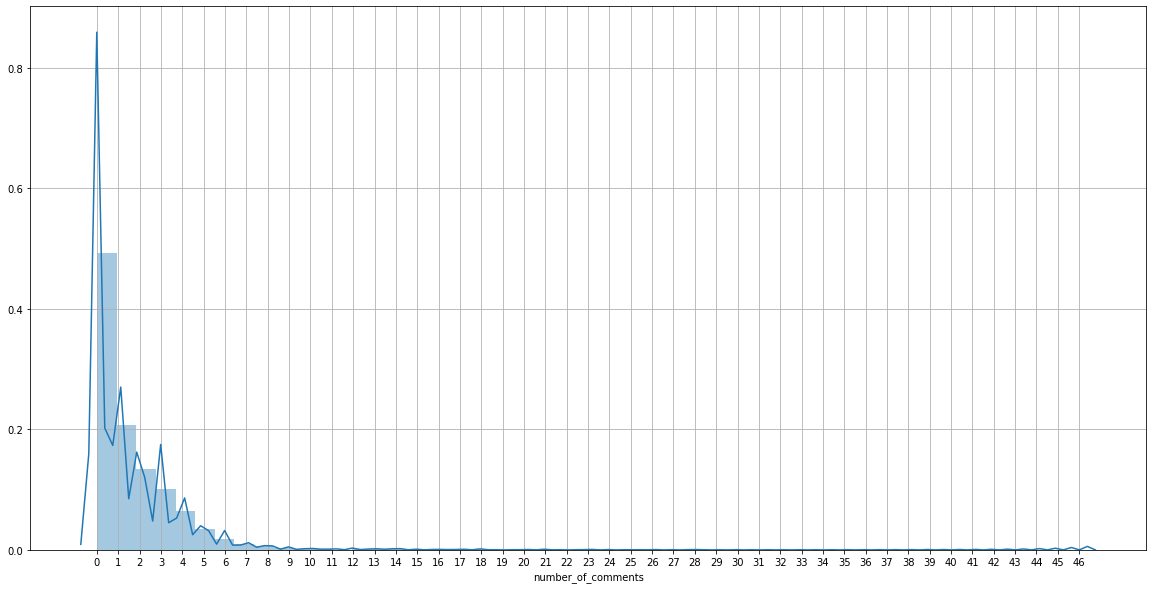

In [82]:
x = two_year_df['number_of_comments']
plt.figure(figsize=(20, 10))
plt.xticks(np.arange(min(x), max(x)+1, 1))
sns.distplot(x)
plt.grid()

In [83]:
df.number_of_comments.describe()

count    9332.000000
mean        1.573939
std         2.601986
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        46.000000
Name: number_of_comments, dtype: float64